<a href="https://colab.research.google.com/github/HiteshSamurai/Front-end-web-development-project/blob/main/SucRe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [21]:
# Load the data
raw_data = pd.read_csv('Categorical.csv')
# Check the data
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [35]:
df = raw_data.copy()
# Reset the index to turn it into a column
df = df.reset_index()

# Drop duplicate rows based on the 'index' column, keeping the last occurrence
df = df.drop_duplicates(subset='index', keep='last')

# Set the 'index' column back as the DataFrame's index
df = df.set_index('index')

# Optionally, sort the index
df = df.sort_index()

In [36]:
data_mapped = df.copy()
#data_mapped = data_mapped.drop(['Unnamed: 0'], axis = 1)
data_mapped['continent']=data_mapped['continent'].map({'Asia':0 , 'Africa':1, 'North America':2, 'South America':3,'Europe':4,'Oceania':5, 'Seven seas (open ocean)':6})

In [37]:
data_mapped

,name,Longitude,Latitude,continent
index,,,,
0,Aruba,-69.982677,12.520880,2.0
1,Afghanistan,66.004734,33.835231,0.0
2,Angola,17.537368,-12.293361,1.0
3,Anguilla,-63.064989,18.223959,2.0
4,Albania,20.049834,41.142450,4.0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5.0
237,Yemen,47.586762,15.909280,0.0
238,South Africa,25.083901,-29.000341,1.0


In [38]:
x = data_mapped.iloc[:, 3:4]
x.dropna(inplace=True)
x

<ipython-input-38-29a9968a4ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)


,continent
index,
0,2.0
1,0.0
2,1.0
3,2.0
4,4.0
...,...
236,5.0
237,0.0
238,1.0


In [39]:
kmeans = KMeans(7)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [40]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 1, 3, 2, 2, 2, 4, 6, 4, 5, 5, 0, 3, 5, 2, 4, 1, 2, 1, 1, 4,
       2, 4, 3, 3, 2, 3, 2, 3, 3, 6, 6, 3, 4, 4, 1, 1, 2, 6, 4, 1, 1, 1,
       1, 5, 6, 1, 1, 3, 3, 3, 3, 4, 4, 2, 2, 1, 3, 2, 3, 1, 6, 1, 1, 2,
       2, 1, 2, 5, 6, 2, 2, 5, 1, 2, 4, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 5,
       6, 4, 0, 3, 2, 3, 2, 4, 2, 4, 4, 0, 2, 4, 4, 2, 4, 2, 3, 2, 4, 4,
       4, 4, 1, 4, 4, 5, 3, 4, 2, 4, 4, 4, 1, 1, 3, 2, 4, 1, 2, 2, 2, 4,
       3, 1, 2, 2, 1, 0, 3, 5, 2, 1, 2, 4, 2, 4, 5, 1, 1, 3, 0, 1, 4, 1,
       5, 1, 5, 1, 3, 5, 2, 2, 4, 5, 5, 4, 4, 3, 5, 6, 4, 5, 5, 2, 3, 4,
       2, 6, 4, 5, 4, 2, 2, 1, 1, 4, 1, 1, 1, 4, 0, 0, 5, 1, 3, 2, 1, 1,
       3, 2, 1, 6, 2, 2, 2, 1, 3, 0, 4, 3, 1, 1, 4, 4, 4, 4, 5, 3, 1, 4,
       4, 1, 1, 2, 6, 3, 4, 2, 3, 6, 3, 3, 4, 5, 5, 5, 4, 1, 1, 1],
      dtype=int32)

In [43]:
data_with_clusters = data_mapped.loc[x.index].copy()
data_with_clusters
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
index,,,,,
0,Aruba,-69.982677,12.520880,2.0,3
1,Afghanistan,66.004734,33.835231,0.0,4
2,Angola,17.537368,-12.293361,1.0,1
3,Anguilla,-63.064989,18.223959,2.0,3
4,Albania,20.049834,41.142450,4.0,2
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5.0,5
237,Yemen,47.586762,15.909280,0.0,4
238,South Africa,25.083901,-29.000341,1.0,1


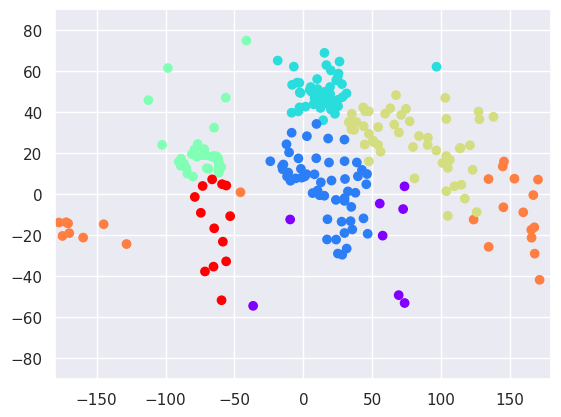

In [45]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()